In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas_datareader as web
import seaborn as sns

In [2]:
df = web.DataReader('aapl', 'yahoo', '2018-01-01', '2021-01-01')

<AxesSubplot:xlabel='Date'>

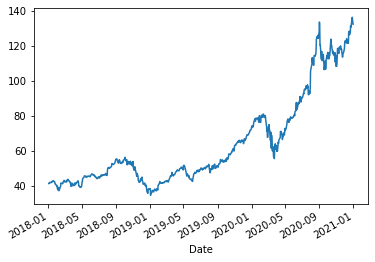

In [3]:
df['Adj Close'].plot()

In [4]:
timeseries = df['Adj Close']

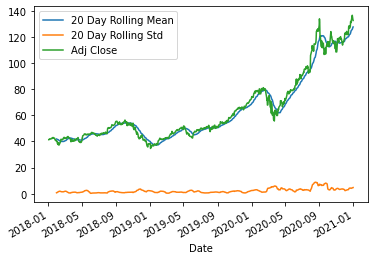

In [5]:
timeseries.rolling(20).mean().plot(label='20 Day Rolling Mean')
timeseries.rolling(20).std().plot(label='20 Day Rolling Std')
timeseries.plot()
plt.legend()

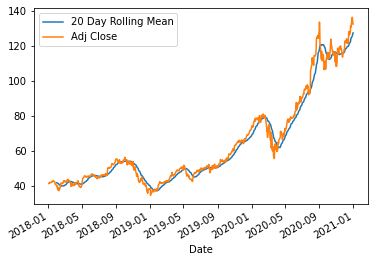

In [6]:
timeseries.rolling(20).mean().plot(label='20 Day Rolling Mean')
timeseries.plot()
plt.legend()

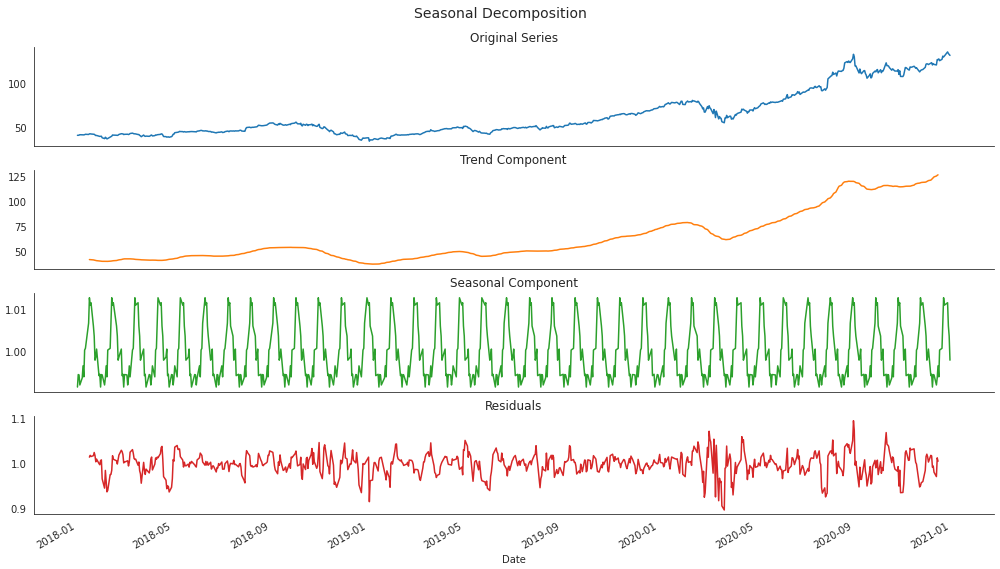

In [7]:
components = seasonal_decompose(df['Adj Close'], model='multiplicative', period=20)
ts = (df['Adj Close'].to_frame('Original')
      .assign(Trend=components.trend)
      .assign(Seasonality=components.seasonal)
      .assign(Residual=components.resid))
with sns.axes_style('white'):
    ts.plot(subplots=True, figsize=(14, 8), title=['Original Series', 'Trend Component', 'Seasonal Component','Residuals'], legend=False)
    plt.suptitle('Seasonal Decomposition', fontsize=14)
    sns.despine()
    plt.tight_layout()
    plt.subplots_adjust(top=.91);

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
result = adfuller(df['Adj Close'])

In [10]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adf_check(df['Adj Close'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : 1.1254995671438441
p-value : 0.9954284816404171
#Lags Used : 9
Number of Observations Used : 746
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
df['First Difference'] = df['Adj Close'] - df['Adj Close'].shift(1)

In [14]:
adf_check(df['First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -8.444001129107566
p-value : 1.7324805034372594e-13
#Lags Used : 8
Number of Observations Used : 746
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

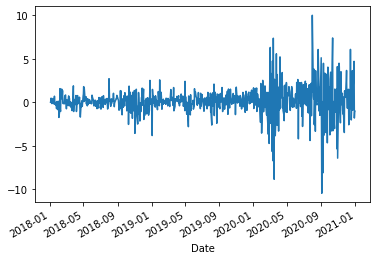

In [16]:
df['First Difference'].plot()

In [17]:
df['Seasonal Difference'] = df['Adj Close'] - df['Adj Close'].shift(20)

<AxesSubplot:xlabel='Date'>

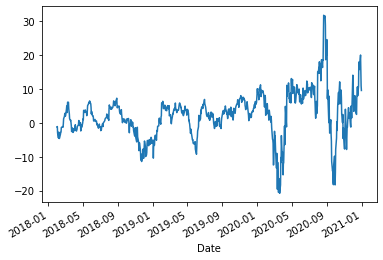

In [18]:
df['Seasonal Difference'].plot()

In [19]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.452341816892103
p-value : 0.009298812112151915
#Lags Used : 20
Number of Observations Used : 715
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

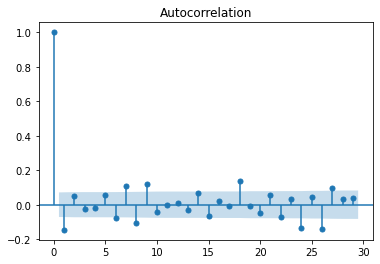

In [21]:
fig_first = plot_acf(df["First Difference"].dropna())

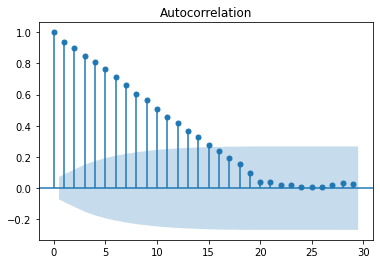

In [22]:
fig_seasonal_first = plot_acf(df["Seasonal Difference"].dropna())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

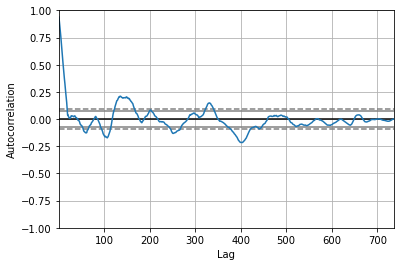

In [23]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Seasonal Difference'].dropna())

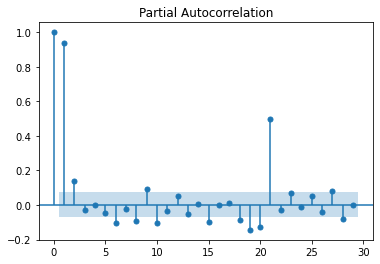

In [24]:
result = plot_pacf(df["Seasonal Difference"].dropna())

In [ ]:
model = sm.tsa.statespace.SARIMAX(df['Milk in pounds per cow'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())